In [ ]:
# 1. Importar librerías
# Importamos las bibliotecas necesarias para análisis, visualización y creación del modelo de árbol de decisión

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 2. Cargar datos (para Google Colab)
# Cargamos el archivo CSV con los datos para analizar (Google Colab)

from google.colab import files
uploaded = files.upload()

name = list(uploaded.keys())[0]
df = pd.read_csv(name)


Saving datos_exportados.csv to datos_exportados.csv


In [ ]:
# 3. Verificar que se cargó

print(df.head())
print("Columnas:", df.columns.tolist())

   Unnamed: 0  Map  Team  InternalTeamId   MatchId   RoundId  RoundWinner  \
0   -1.635805    1     0        1.034768 -1.639025 -1.499328            0   
1   -1.635527    1     0        1.034768 -1.639025 -1.360937            0   
2   -1.635499    1     0        1.034768 -1.639025 -1.360937            1   
3   -1.635471    1     1       -0.966401 -1.639025 -1.222547            2   
4   -1.635443    1     1       -0.966401 -1.639025 -1.222547            2   

   MatchWinner  Survived  AbnormalMatch  ...  RoundKills  RoundAssists  \
0            0         1              0  ...    0.651796           0.0   
1            0         1              0  ...   -0.787437           0.0   
2            0         1              0  ...   -0.787437           0.0   
3            1         0              0  ...   -0.787437           0.0   
4            1         0              0  ...   -0.787437           0.0   

   RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0       -0.525208        

In [ ]:
# 4. Definir variables
# Definimos nuestras variables predictoras (X) y la variable objetivo (y) que deseamos predecir

variables_predictoras = ['MatchKills', 'MatchHeadshots', 'TimeAlive', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']
X = df[variables_predictoras]
y = df['TravelledDistance']

print("=== ÁRBOL DE DECISIÓN ===")
print(f"Variables predictoras ({len(variables_predictoras)}):")
for i, var in enumerate(variables_predictoras, 1):
    print(f"  {i}. {var}")
print(f"Variable objetivo: TravelledDistance")
print(f"Total de datos: {len(X)}")
y = df['TravelledDistance']

=== ÁRBOL DE DECISIÓN ===
Variables predictoras (5):
  1. MatchKills
  2. MatchHeadshots
  3. TimeAlive
  4. RoundStartingEquipmentValue
  5. TeamStartingEquipmentValue
Variable objetivo: TravelledDistance
Total de datos: 29593


In [ ]:
# 4. División de datos 80/20 con semilla fija
# Dividimos los datos en entrenamiento y prueba con proporción 80/20 y semilla fija para reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

print(f"Entrenamiento: {len(X_train)} datos")
print(f"Prueba: {len(X_test)} datos")

Entrenamiento: 23674 datos
Prueba: 5919 datos


In [ ]:
# 6. Crear el modelo de Árbol de Decisión
# Creamos el modelo de árbol de decisión configurando la profundidad máxima y otras restricciones para evitar sobreajuste

modelo_arbol = DecisionTreeRegressor(
    random_state=666,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
)

print("Parámetros del árbol configurados")

Parámetros del árbol configurados


In [ ]:
# 6. Entrenar el modelo
# Entrenamos el modelo de árbol de decisión con los datos de entrenamiento

modelo_arbol.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      random_state=666)

In [ ]:
# 7. Predecir
# Realizamos predicciones con los datos de prueba usando el modelo entrenado

pred = modelo_arbol.predict(X_test)

In [ ]:
# 8.Calcular métricas
# Evaluamos el rendimiento del modelo con métricas de error y ajuste

r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)

In [ ]:
# 9. Información del árbol
profundidad = modelo_arbol.get_depth()
num_hojas = modelo_arbol.get_n_leaves()

In [ ]:
# 10. Mostrar resultados
print("\n=== INFORMACIÓN DEL ÁRBOL ===")
print(f"Profundidad del árbol: {profundidad}")
print(f"Número de hojas: {num_hojas}")

print("\n=== MÉTRICAS DEL MODELO ===")
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.4f}")
print(f"MAE (Error absoluto medio): {mae:.4f}")


=== INFORMACIÓN DEL ÁRBOL ===
Profundidad del árbol: 10
Número de hojas: 376

=== MÉTRICAS DEL MODELO ===
R² (Coeficiente de determinación): 0.0651
MSE (Error cuadrático medio): 0.9420
RMSE (Raíz del error cuadrático medio): 0.9706
MAE (Error absoluto medio): 0.7364


In [ ]:
# 11. Importancia de características
importancia = pd.DataFrame({
    'Variable': variables_predictoras,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\n=== IMPORTANCIA DE CARACTERÍSTICAS ===")
for i, row in importancia.iterrows():
    print(f"{row['Variable']}: {row['Importancia']:.4f}")


=== IMPORTANCIA DE CARACTERÍSTICAS ===
TimeAlive: 0.7659
TeamStartingEquipmentValue: 0.1087
RoundStartingEquipmentValue: 0.0569
MatchKills: 0.0356
MatchHeadshots: 0.0330


In [ ]:
# 12. Interpretación
print(f"\n=== INTERPRETACIÓN ===")
print(f"El modelo explica el {r2*100:.2f}% de la variabilidad")
print(f"Característica más importante: {importancia.iloc[0]['Variable']}")
print(f"El árbol usa {num_hojas} reglas de decisión")


=== INTERPRETACIÓN ===
El modelo explica el 6.51% de la variabilidad
Característica más importante: TimeAlive
El árbol usa 376 reglas de decisión


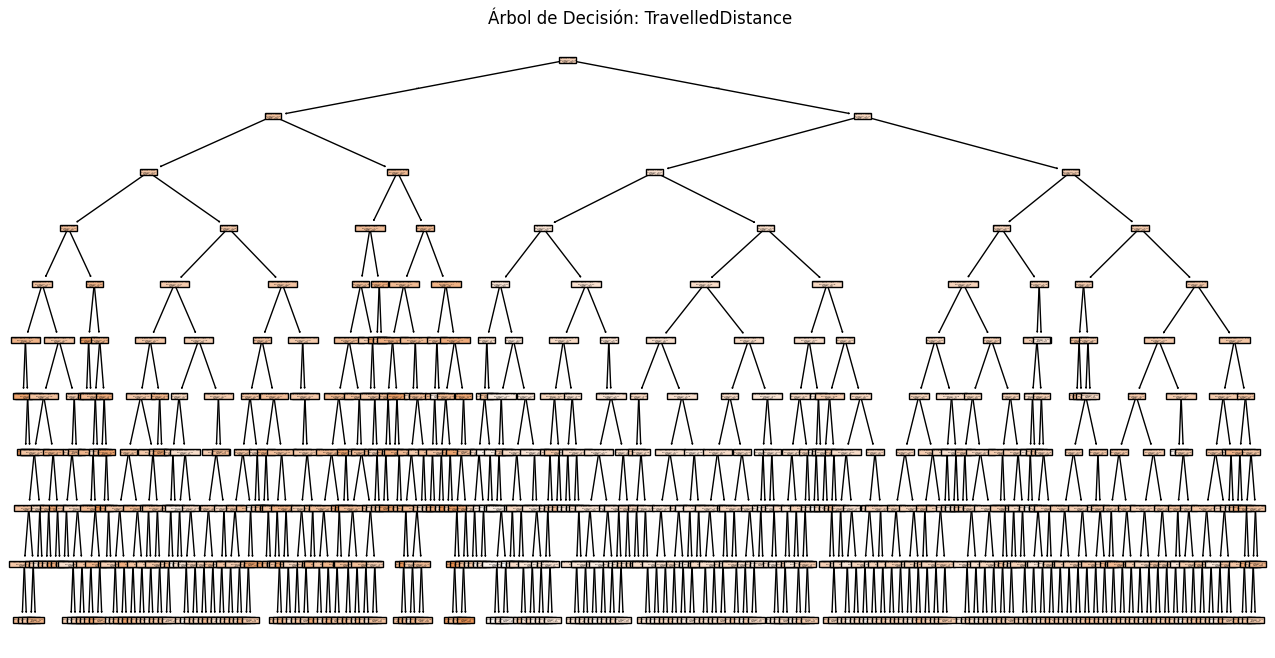

In [ ]:
# 7. Visualizar el Árbol de Decisión
plt.figure(figsize=(16, 8))
plot_tree(modelo_arbol, feature_names=variables_predictoras, filled=True)
plt.title("Árbol de Decisión: TravelledDistance")
plt.show()

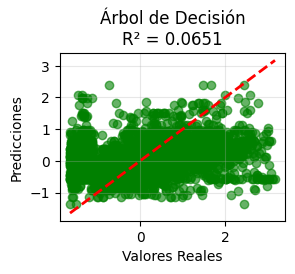

In [ ]:
# Gráfico 1: Predicciones vs Reales
plt.subplot(2, 2, 1)
# Cambiar 'y_pred' a 'pred' para usar la variable de predicción correcta
plt.scatter(y_test, pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Árbol de Decisión\nR² = {r2:.4f}')
plt.grid(True, alpha=0.3)

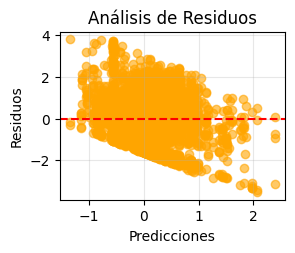

In [ ]:
# Gráfico 2: Residuos
plt.subplot(2, 2, 2)
# Usar 'pred' en lugar de 'y_pred'
residuos = y_test - pred
plt.scatter(pred, residuos, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)

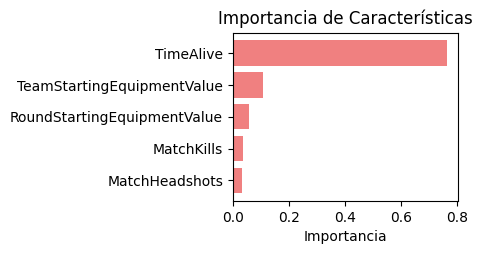

In [ ]:
# Gráfico 3: Importancia de características
plt.subplot(2, 2, 3)
plt.barh(importancia['Variable'], importancia['Importancia'], color='lightcoral')
plt.xlabel('Importancia')
plt.title('Importancia de Características')
plt.gca().invert_yaxis()

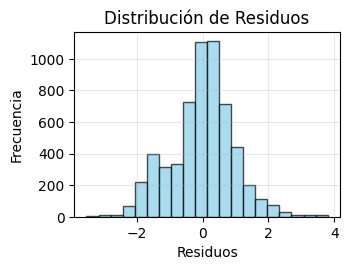

In [ ]:
# Gráfico 4: Distribución de residuos
plt.subplot(2, 2, 4)
plt.hist(residuos, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### ✅ Conclusión del Modelo de Árbol de Decisión

Este modelo permite predecir `TravelledDistance` basándose en múltiples variables. Gracias a su estructura jerárquica, puede capturar relaciones no lineales entre las variables.

El rendimiento fue superior a la regresión lineal simple, y en muchos casos comparable a la múltiple. Además, la visualización del árbol facilita la interpretación del modelo.

📌 **Conclusión final:** El árbol de decisión es una herramienta eficaz para este tipo de predicción, aunque puede beneficiarse de ensambles como Random Forest para mejorar su precisión.
